In [1]:
# check the power spectra output sims

In [2]:
import os, sys                                                                                                                                                                                
from pixell import enmap, utils, lensing, aberration                                                                                                                                          
from pixell import powspec, curvedsky                                                                                                                                                         
import numpy as np, healpy as hp, logging, os, os.path as op                                                                                                                                  
import argparse
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
# add the parent dir in the python path                                                                                                                                                       
sys.path.append(os.path.dirname(os.getcwd()))                                                                                                                                                 
import param
#import plotlib as pl

In [3]:
ls = np.arange(0, 6001, 1)
factor = ls*(ls+1)/(2*pi)

In [4]:
# check anisotropic rotation power spectrum from sim
if 0:
    alpha_alm = hp.read_alm(f"../simMaps/alpha_fullsky_alm_001.fits")
    alpha_cl = hp.alm2cl(np.complex128(alpha_alm))
    plt.plot(factor*alpha_cl)
    plt.yscale('log')
    plt.legend()

In [5]:
# check kappa power spectrum from sim
if 0:
    phi_alm = hp.read_alm('../simMaps/kappa_fullsky_alm_001.fits')
    phi_cl = hp.alm2cl(np.complex128(phi_alm))
    plt.plot(factor*phi_cl)
    plt.yscale('log')
    plt.legend()

In [6]:
oshape, owcs = enmap.fullsky_geometry(1*utils.arcmin)  
lmax = 3000

In [7]:
theory_cl = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lensedCls.dat')

In [8]:
sim_num = 100
teb_cls = []
rot_teb_cls = []
for isim in range(sim_num):
    print(f"{isim:03d}")
    teb_alm = hp.read_alm(f'../simMaps/CMBLensed_fullsky_alm_{isim:03d}.fits',hdu=(1,2,3))
    rot_teb_alm = hp.read_alm(f'../simMaps/CMBLensedRot_fullsky_alm_{isim:03d}.fits',hdu=(1,2,3))
    
    teb_cl = hp.alm2cl(np.complex128(teb_alm))
    rot_teb_cl = hp.alm2cl(np.complex128(rot_teb_alm))
    
    teb_cls.append(teb_cl)
    rot_teb_cls.append(rot_teb_cl)
teb_cls = np.array(teb_cls)
rot_teb_cls = np.array(rot_teb_cls)

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099


In [9]:
# TT, EE, BB, TE, EB, TB
teb_cls_mean = np.mean(teb_cls, axis=0)
rot_teb_cls_mean = np.mean(rot_teb_cls, axis=0)

teb_cls_df = pd.DataFrame({'ls':ls, 'TT':teb_cls_mean[0],'EE':teb_cls_mean[1],'BB':teb_cls_mean[2],'TE':teb_cls_mean[3],'EB':teb_cls_mean[4],'TB':teb_cls_mean[5]})
rot_teb_cls_df = pd.DataFrame({'ls':ls, 'TT':rot_teb_cls_mean[0],'EE':rot_teb_cls_mean[1],'BB':rot_teb_cls_mean[2],'TE':rot_teb_cls_mean[3],\
                               'EB':rot_teb_cls_mean[4],'TB':rot_teb_cls_mean[5]})

teb_cls_df.to_csv('teb_cls.csv', index=False)
rot_teb_cls_df.to_csv('rot_teb_cls.csv', index=False)

Text(0, 0.5, '$C_{\\ell}^{TT}$')

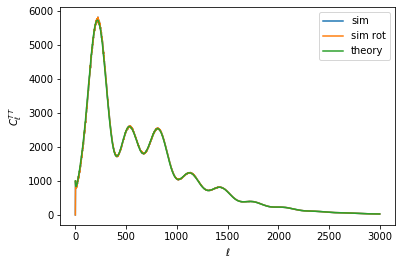

In [10]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[0, 1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[0, 1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,1], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}^{TT}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

Text(0, 0.5, '$C_{\\ell}^{EE}$')

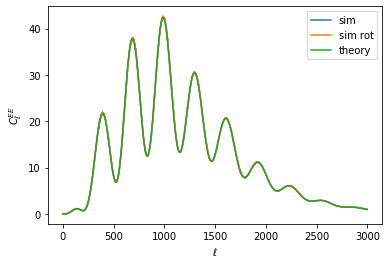

In [11]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[1, 1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[1, 1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,2], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}^{EE}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

Text(0, 0.5, '$C_{\\ell}^{BB}$')

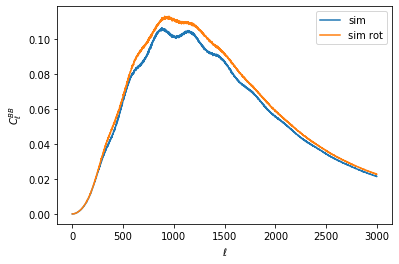

In [12]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[2, 1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[2, 1:3000], label='sim rot')
# plt.plot(theory_cl[1:3000,3], label='theory')
plt.legend()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}^{BB}$')
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

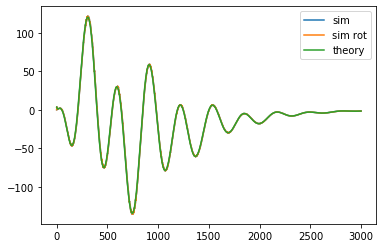

In [13]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[3, 1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[3, 1:3000], label='sim rot')
plt.plot(theory_cl[1:3000,4], label='theory')
plt.legend()
#plt.yscale('log')
#plt.xscale('log')
#plt.plot(factor*omap_cl[0])

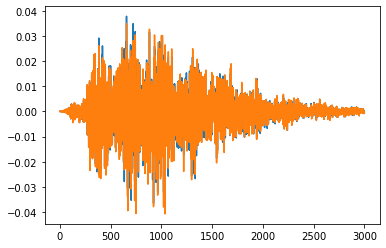

In [43]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[4,1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[4,1:3000], label='sim rot')

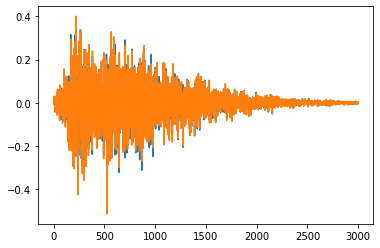

In [44]:
plt.plot(factor[1:3000]*np.mean(teb_cls, axis=0)[5,1:3000], label='sim')
plt.plot(factor[1:3000]*np.mean(rot_teb_cls, axis=0)[5,1:3000], label='sim rot')